In [27]:
# Required Libraries
import pandas as pd
import numpy as np

# Load the dataset
zillow_data = pd.read_csv("C:/Users/aharo/OneDrive/Documents/GitHub/Preparing-Time-Series-from-Wide-Form-Data/Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Show the first few rows
zillow_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


The dataset contains the city-level home value data from January 2000 to September 2022. There are several columns in the dataset, but the most important ones for our purposes are:

- 'SizeRank': This indicates the size of the city, with smaller numbers representing larger cities.


- 'RegionName': This is the name of the city.


- The date columns (e.g., '2000-01-31', '2000-02-29', etc.): These represent the value of the Zillow Home Value Index at the end of each month.

In [28]:
# Let's now filter the data to include only the 4 largest cities

# Filter the 4 largest cities into a new dataframe
largest_cities = zillow_data[zillow_data['SizeRank'].isin([0,1,2,3])]

# Show the filtered data
largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


The filtered data now includes only the 4 largest cities: New York, Los Angeles, Houston, and Chicago.

In [29]:
# Melt the data to long-form 
melted_data = largest_cities.melt(id_vars=['RegionName'], 
                                  value_vars=largest_cities.columns[8:], 
                                  var_name='Date', 
                                  value_name='ZHVI')

# Convert the melted dates into datetime datatype
melted_data['Date'] = pd.to_datetime(melted_data['Date'])

# Make the datetime column the index
melted_data.set_index('Date', inplace=True)

# Show the melted data
melted_data.head()

,RegionName,ZHVI
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0


The data has been successfully transformed into long form and is ready for time series analysis. Each row now represents a single city at a single point in time, with the 'Date' column serving as the index. The 'ZHVI' column represents the Zillow Home Value Index for that city at the given date.

In [30]:
# Resample the dataframe as monthly frequency, grouped by City
resampled_data = melted_data.groupby('RegionName').resample('M').mean()

# Unstack the data
unstacked_data = resampled_data.unstack(level=0)

# Define home_values_2008
home_values_2008 = unstacked_data.loc['2008-12-31']

# City with the highest typical home value at the end of 2008
highest_2008_city = home_values_2008.idxmax()[1]
highest_2008_value = home_values_2008.max()

# City with the least typical home value at the end of 2008
lowest_2008_city = home_values_2008.idxmin()[1]
lowest_2008_value = home_values_2008.min()

highest_2008_city, highest_2008_value, lowest_2008_city, lowest_2008_value

# Show the resampled data
resampled_data.head()

ZHVI
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0

The data has been successfully resampled at a monthly frequency. Now, each row represents the average Zillow Home Value Index for each city, for each month.

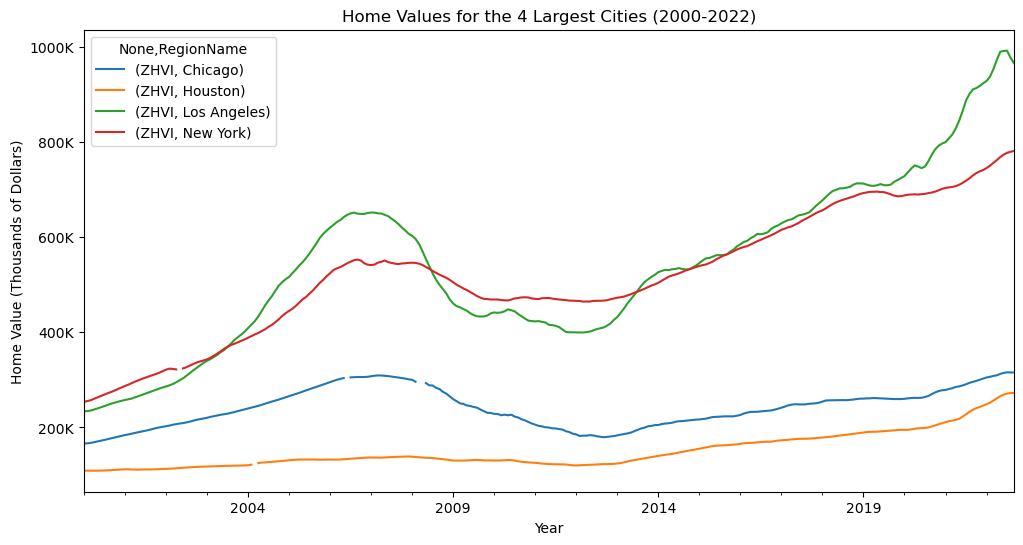

In [31]:
# Required Libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to convert y-axis to thousands
def thousands(x, pos):
    return '%1.0fK' % (x * 1e-3)

formatter = FuncFormatter(thousands)

# Unstack the data
unstacked_data = resampled_data.unstack(level=0)

# Plot the data
fig, ax = plt.subplots(figsize=(12,6))
unstacked_data.plot(ax=ax)

# Format the y-axis
ax.yaxis.set_major_formatter(formatter)

# Add title and labels
plt.title("Home Values for the 4 Largest Cities (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Home Value (Thousands of Dollars)")

# Show the plot
plt.show()

The line plot displays the home values for the four largest cities from January 2000 to September 2022. We can observe that all four cities show a general trend of increasing home values over time. However, the rates of increase vary among the cities, with Los Angeles showing the steepest increase, followed by New York. Chicago and Houston have relatively flatter trends, indicating slower rates of increase in home values.

# Q1: Which city had the highest typical home value at the end of 2008? Which had the least?

In [32]:
# City with the highest typical home value at the end of 2008
highest_2008_city = home_values_2008.idxmax()[1]
highest_2008_value = home_values_2008.max()

# City with the least typical home value at the end of 2008
lowest_2008_city = home_values_2008.idxmin()[1]
lowest_2008_value = home_values_2008.min()

highest_2008_city, highest_2008_value, lowest_2008_city, lowest_2008_value

('New York', 510309.0, 'Houston', 131283.0)

The city with the highest typical home value at the end of 2008 was New York, with a home value of $510,309.

The city with the lowest typical home value was Houston, with a home value of $131,283.

# Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [33]:
# Calculate the difference between the two months
home_value_diff = unstacked_data.loc['2008-12-31'] - unstacked_data.loc['2008-11-30']

# Display the changes
home_value_diff

      RegionName 
ZHVI  Chicago        -5753.0
      Houston         -964.0
      Los Angeles   -12611.0
      New York       -4458.0
dtype: float64

The changes in home values from November 2008 to December 2008 were as follows:

- Chicago: Decrease of $5,753


- Houston: Decrease of $964


- Los Angeles: Decrease of $12,611


- New York: Decrease of $4,458


All four cities saw a decrease in home values during this period. The largest decrease occurred in Los Angeles, while the smallest decrease was in Houston. This suggests that the housing market in all four cities was experiencing a downturn at the end of 2008, which aligns with the global financial crisis that occurred around this time.